In [206]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy import stats

In [207]:
df = pd.read_excel('files/ETHICS.xlsx')
df

,PREVUSE,SPEC,YRSPRAC,EDHRS,FUTUREUSE,ECTRAIN,ECEDUC,ECMORAL,ECFULL
0,NEVER,SURG,6,6,NO,.,.,.,.
1,NEVER,MED,27,0,NO,.,.,.,.
2,NEVER,MED,7,5,NO,1,1,5,5
3,NEVER,SURG,25,6,NO,4,4,2,2
4,NEVER,SURG,1,12,NO,3,3,2,3
...,...,...,...,...,...,...,...,...,...
113,NEVER,MED,5,30,YES,5,5,3,1
114,NEVER,SURG,.,.,YES,3,2,4,2
115,USED,MED,20,4,YES,4,4,1,1
116,NEVER,MED,14,.,YES,3,3,3,3


### a. Graphic of prevuse is used or not

Text(0.5, 1.0, 'Prevuse is used or not')

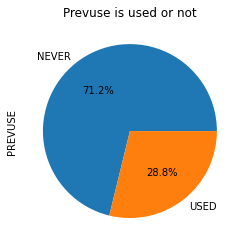

In [10]:
fig1 = df['PREVUSE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig1.set_title('Prevuse is used or not')

### b. Graphic of will not use in future

Text(0.5, 1.0, 'Prevuse will be used or not')

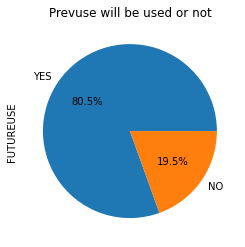

In [11]:
fig2 = df['FUTUREUSE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig2.set_title('Prevuse will be used or not')

### c. Graphic compare SURG and MED about preuse or not

Text(0.5, 1.0, 'SURG')

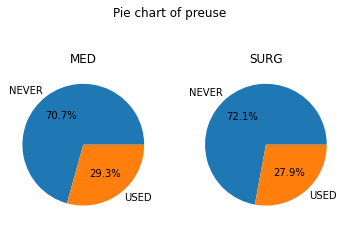

In [78]:
fig3, (ax1,ax2) = mpl.pyplot.subplots(1,2)

fig3.suptitle('Pie chart of preuse')

labels = ['NEVER', 'USED']

ax1.pie(df[df['SPEC'] == 'MED']['PREVUSE'].value_counts(), autopct='%1.1f%%', labels=labels)
ax1.set_title('MED')


ax2.pie(df[df['SPEC'] == 'SURG']['PREVUSE'].value_counts(), autopct='%1.1f%%', labels=labels)
ax2.set_title('SURG')

### d. Graphic compare SURG and MED will not use in future

Text(0.5, 1.0, 'SURG')

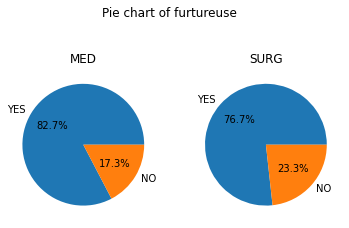

In [77]:
fig4, (ax1,ax2) = mpl.pyplot.subplots(1,2)

fig4.suptitle('Pie chart of furtureuse')

labels = ['YES', 'NO']

ax1.pie(df[df['SPEC'] == 'MED']['FUTUREUSE'].value_counts(), autopct='%1.1f%%', labels=labels)
ax1.set_title('MED')


ax2.pie(df[df['SPEC'] == 'SURG']['FUTUREUSE'].value_counts(), autopct='%1.1f%%', labels=labels)
ax2.set_title('SURG')

### e. Years in pratices for two group of doctors

Text(0.5, 1.0, 'YES')

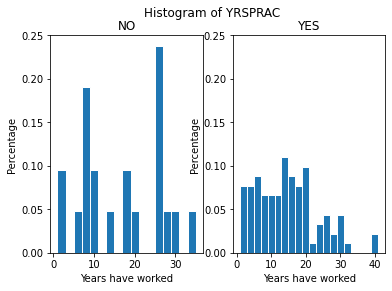

In [136]:
from matplotlib.pyplot import xlim


fig5, (ax1,ax2) = mpl.pyplot.subplots(1,2)

fig5.suptitle('Histogram of YRSPRAC')

labels = ['YES', 'NO']


data = df[(df['FUTUREUSE'] == 'NO') & (df['YRSPRAC'] != '.')]['YRSPRAC']
step = 2
start = (min(data) / step) * step
stop = max(data) + step
bin_edges = np.arange(start, stop, step=step)

ax1.hist(data, bins=bin_edges, ec='white', weights=np.ones(len(data)) / len(data))
ax1.set_xlabel('Years have worked')
ax1.set_ylabel('Percentage')
ax1.set_title('NO')

data = df[(df['FUTUREUSE'] == 'YES') & (df['YRSPRAC'] != '.')]['YRSPRAC']
step = 2
start = (min(data) / step) * step
stop = max(data) + step
bin_edges = np.arange(start, stop, step=step)

ax2.hist(data, bins=bin_edges, ec='white', weights=np.ones(len(data)) / len(data))
ax2.set_ylim([0, 0.25])
ax2.set_xlabel('Years have worked')
ax2.set_ylabel('Percentage')
ax2.set_title('YES')

- 38% doctors more than 20 years said "no"
- 19% doctors more than 20 years said "yes"

This support the research saying that the older, more experienced doctors will be less likely to use ethics consultation in the furture.

### f. Mean Median, and Mode for the length of times in practice

In [176]:
df_st = pd.DataFrame({
    'Variable': ['YRSPRAC'],
    'N': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].count()],
    'N*': [df[(df['YRSPRAC'] == '.')]['YRSPRAC'].count()],
    'Mean': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].mean()],
    'Minimum': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].min()],
    'Median': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].median()],
    'Maximum': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].max()],
    'Mode': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].mode().to_list()],
    'Mode Amounts': [stats.mode(df[(df['YRSPRAC'] != '.')]['YRSPRAC'])[1]],
})

df_st

,Variable,N,N*,Mean,Minimum,Median,Maximum,Mode,Mode Amounts
0,YRSPRAC,112,6,14.598214,1,14.0,40,"[14, 20, 25]",[9]


### g. & h. Mean Median, and Mode for the length of times in practice split by FUTUREUSE

In [186]:
df_yes = df[df['FUTUREUSE'] == 'YES']
df_no = df[df['FUTUREUSE'] == 'NO']

df_st = pd.DataFrame({
    'Variable': 'YRSPRAC',
    'FUTUREUSE': ['YES', 'NO'],
    'N': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].count(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].count()],
    'N*': [df_yes[(df_yes['YRSPRAC'] == '.')]['YRSPRAC'].count(), df_no[(df_no['YRSPRAC'] == '.')]['YRSPRAC'].count()],
    'Mean': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].mean(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].mean()],
    'Minimum': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].min(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].min()],
    'Median': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].median(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].median()],
    'Maximum': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].max(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].max()],
    'Mode': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].mode().to_list(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].mode().to_list()],
    'Mode Amounts': [stats.mode(df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'])[1], stats.mode(df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'])[1]],
})

df_st

,Variable,FUTUREUSE,N,N*,Mean,Minimum,Median,Maximum,Mode,Mode Amounts
0,YRSPRAC,YES,91,4,14.175824,1,14.0,40,"[14, 20]",[8]
1,YRSPRAC,NO,21,2,16.428571,1,18.0,35,[25],[5]


### i. Use g, h to comment the medical researchers' theory

The mean, median and mode who will not use in furture are higher than those who will use which inference the same result as the researchers' results

### j. Range, variance and standard deviaton for the length of times in practice

In [195]:
df_st = pd.DataFrame({
    'Variable': ['YRSPRAC'],
    'N': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].count()],
    'N*': [df[(df['YRSPRAC'] == '.')]['YRSPRAC'].count()],
    'Mean': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].mean()],
    'StDev': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].std()],
    'Variance': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].var()],
    'Range': [df[(df['YRSPRAC'] != '.')]['YRSPRAC'].max() - df[(df['YRSPRAC'] != '.')]['YRSPRAC'].min()]
})

df_st

,Variable,N,N*,Mean,StDev,Variance,Range
0,YRSPRAC,112,6,14.598214,9.160687,83.918195,39


### k. & l. Range, variance and standard deviaton for the length of times in practice split by FUTUREUSE

In [199]:
df_yes = df[df['FUTUREUSE'] == 'YES']
df_no = df[df['FUTUREUSE'] == 'NO']

df_st = pd.DataFrame({
    'Variable': 'YRSPRAC',
    'FUTUREUSE': ['YES', 'NO'],
    'N': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].count(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].count()],
    'N*': [df_yes[(df_yes['YRSPRAC'] == '.')]['YRSPRAC'].count(), df_no[(df_no['YRSPRAC'] == '.')]['YRSPRAC'].count()],
    'Mean': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].mean(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].mean()],
    'StDev': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].std(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].std()],
    'Variance': [df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].var(), df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].var()],
    'Range': [
        df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].max() - df_yes[(df_yes['YRSPRAC'] != '.')]['YRSPRAC'].min(), 
        df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].max() - df_no[(df_no['YRSPRAC'] != '.')]['YRSPRAC'].min()
    ]
})

df_st

,Variable,FUTUREUSE,N,N*,Mean,StDev,Variance,Range
0,YRSPRAC,YES,91,4,14.175824,8.949976,80.102076,39
1,YRSPRAC,NO,21,2,16.428571,10.047743,100.957143,34


### m. Use g, h to compare the variation in the length of the time practice

The variation for who refuses to use is greater than who would use

### n. Scatterplot of YRSPRAC vs EDHRS

[Text(0.5, 1.0, 'YRSPRAC vs EDHRS'),
 Text(0.5, 0, 'EDHRS'),
 Text(0, 0.5, 'YRSPRAC')]

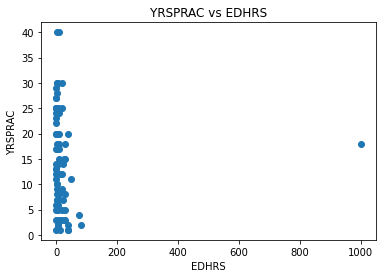

In [245]:
x = df[(df['YRSPRAC'] != '.') & (df['EDHRS'] != '.')]['EDHRS']
y = df[(df['YRSPRAC'] != '.') & (df['EDHRS'] != '.')]['YRSPRAC']

mpl.pyplot.scatter(x, y)
mpl.pyplot.gca().update(dict(title='YRSPRAC vs EDHRS', xlabel='EDHRS', ylabel='YRSPRAC'))

### o. Identify the highly outlier of the set

[Text(0.5, 1.0, 'EDHRS boxplot'), Text(0, 0.5, 'EDHRS')]

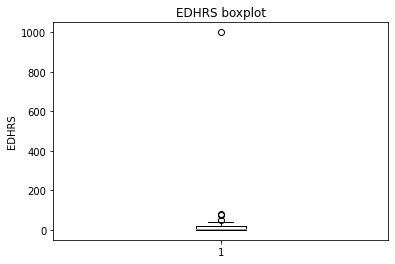

In [249]:
mpl.pyplot.boxplot(df[(df['YRSPRAC'] != '.') & (df['EDHRS'] != '.')]['EDHRS'])
mpl.pyplot.gca().update(dict(title='EDHRS boxplot', ylabel='EDHRS'))

The outlier is the value 1000

p. Remove outlier and re-create the scatter plot of n

[Text(0.5, 1.0, 'YRSPRAC vs EDHRS'),
 Text(0.5, 0, 'EDHRS'),
 Text(0, 0.5, 'YRSPRAC')]

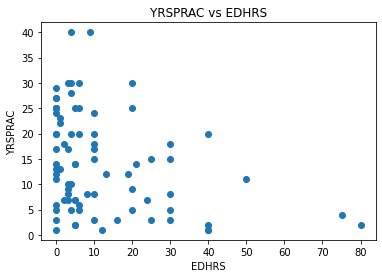

In [246]:
x = df[(df['YRSPRAC'] != '.') & (df['EDHRS'] != '.') & (df['EDHRS'] != 1000)]['EDHRS']
y = df[(df['YRSPRAC'] != '.') & (df['EDHRS'] != '.') & (df['EDHRS'] != 1000)]['YRSPRAC']

mpl.pyplot.scatter(x, y)
mpl.pyplot.gca().update(dict(title='YRSPRAC vs EDHRS', xlabel='EDHRS', ylabel='YRSPRAC'))